In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def shuttle_method(A, d):
    n = d.shape[0]
    b = np.diag(A)
    a = np.insert(np.diag(A, k = -1), 0, 0)
    c = np.insert(np.diag(A, k = 1), n - 1, 0)
    x = np.zeros(n)
    cc = np.zeros(np.size(c))
    dd = np.zeros(np.size(d))
    for i in range(0, n):
        denom = b[i] - cc[i - 1] * a[i]
        cc[i] = c[i] / denom
        dd[i] = (d[i] - a[i] * dd[i - 1]) / denom
    x[n - 1] = dd[n - 1]
    for i in range(n - 1)[::-1]:
        x[i] = dd[i] - cc[i] * x[i + 1]
    return x

In [3]:
def cubic_spline(x, f):
    n = np.size(x)
    T = np.zeros(shape=(n - 2, n - 2))
    h = np.array([x[k] - x[k - 1] for k in range(1, n)])
    T[0, 0] = 2 * (h[0] + h[1])
    for i in range(1, n - 2):
        T[i - 1, i] = T[i, i - 1] = h[i]
        T[i, i] = 2 * (h[i] + h[i + 1])
    df = np.array([(f[k] - f[k - 1]) / h[k - 1] for k in range(1, n)])
    ro = 6 * np.array([df[k + 1] - df[k] for k in range(n - 2)])
    u = shuttle_method(T, ro)
    u = np.insert(u, 0, 0)
    u = np.insert(u, n - 1, 0)
    def cube_spline(z):
        k = np.argmax(x > z)
        t = (z - x[k - 1]) / h[k - 1]
        dS = df[k - 1] - h[k - 1] * u[k - 1] / 3 - h[k - 1] * u[k] / 6 
        S = f[k - 1] + h[k - 1] * t * dS + h[k - 1]**2 * u[k - 1] * (t / 2 + (1 - t)**3 / 6 - 1 / 6) +\
            h[k - 1]**2 * u[k] * t**3 / 6
        return S
    return cube_spline

In [4]:
# Задаём функцию сетку для построения графика
f = lambda x : 1 / (25 * x**2 + 1)
x = np.linspace(-2, 2, 1000)

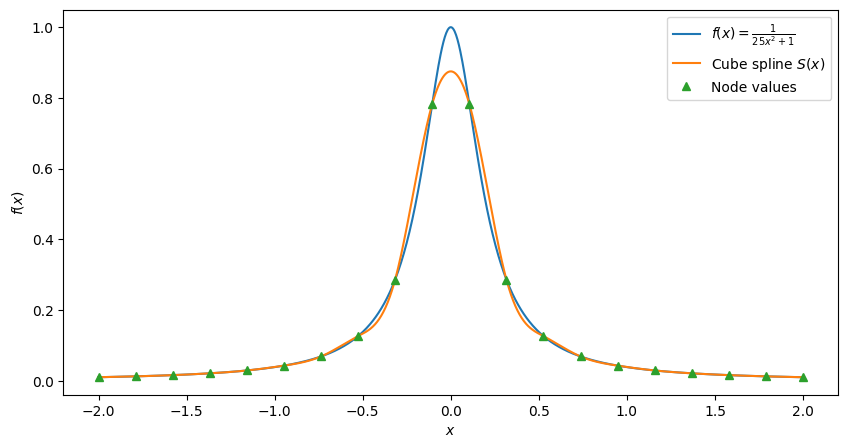

In [5]:
# Построим график для сплайна по равномерной сетке
x_uniform = np.linspace(-2, 2, 20)
spline1 = cubic_spline(x_uniform, f(x_uniform))
plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label=r'$f(x) = \frac{1}{25x^2 + 1}$')
plt.plot(x, [spline1(t) for t in x], label="Cube spline $S(x)$")
plt.plot(x_uniform, [f(t) for t in x_uniform], '^', label="Node values")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

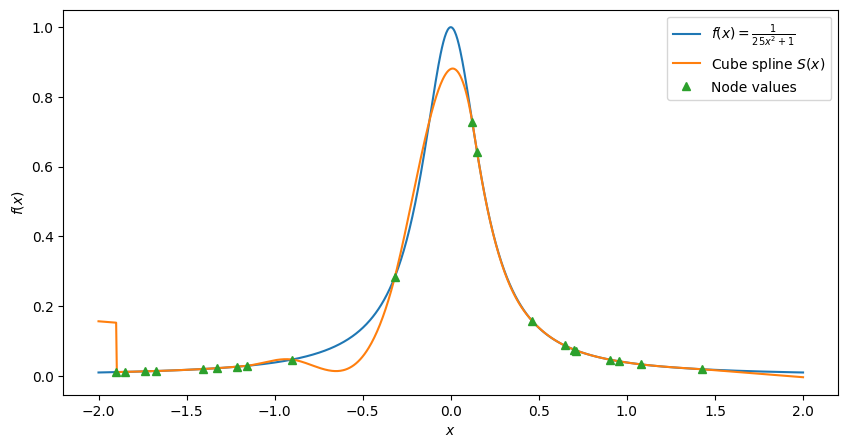

In [6]:
# Построим график для сплайна по неравномерной сетке
x_strange = sorted(np.random.uniform(-2, 2, 20))
spline2 = cubic_spline(x_strange, [f(t) for t in x_strange])
plt.figure(figsize=(10, 5))
plt.plot(x, f(x), label=r'$f(x) = \frac{1}{25x^2 + 1}$')
plt.plot(x, [spline2(t) for t in x], label="Cube spline $S(x)$")
plt.plot(x_strange, [f(t) for t in x_strange], '^', label="Node values")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

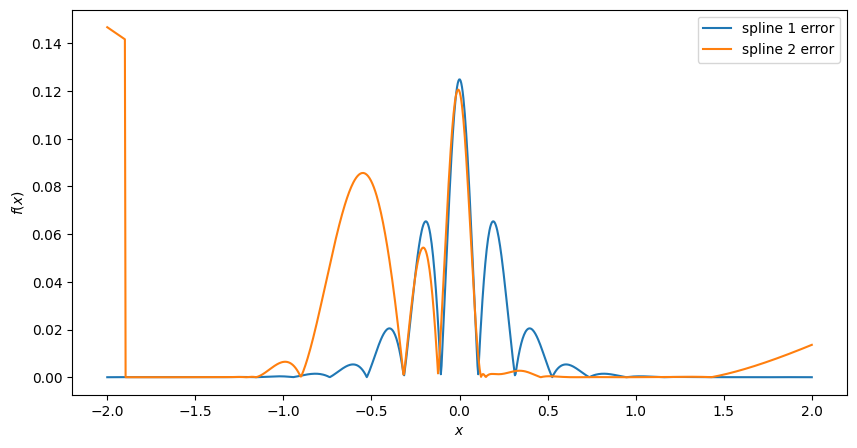

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(x, [np.abs(f(t) - spline1(t)) for t in x], label = "spline 1 error")
plt.plot(x, [np.abs(f(t) - spline2(t)) for t in x], label = "spline 2 error")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()